<a href="https://colab.research.google.com/github/GundekariYeshashwini/Aiml_2303A52023/blob/main/LAB-08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [4]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [5]:
type(car_data)

sklearn.utils._bunch.Bunch

In [6]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [9]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [10]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [16]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [12]:
type(car_data)

pandas.core.frame.DataFrame

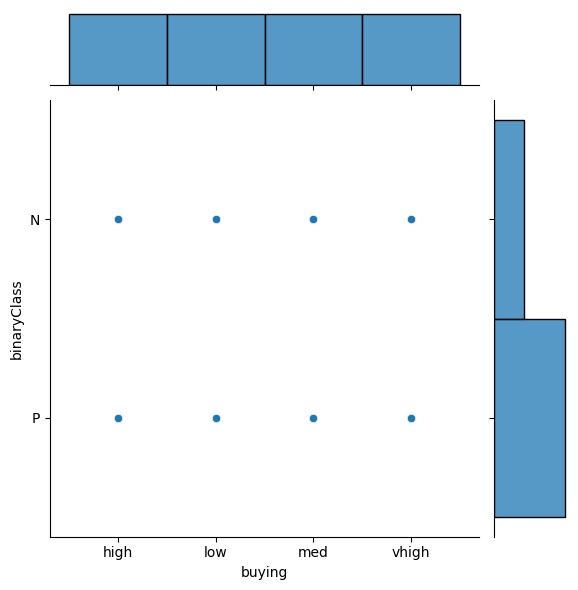

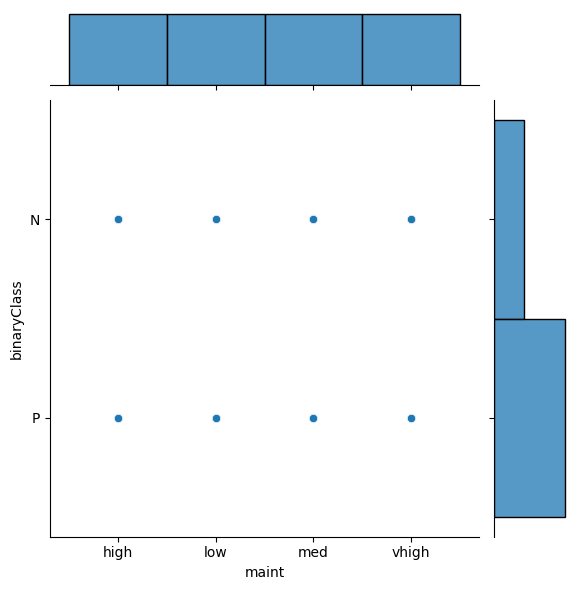

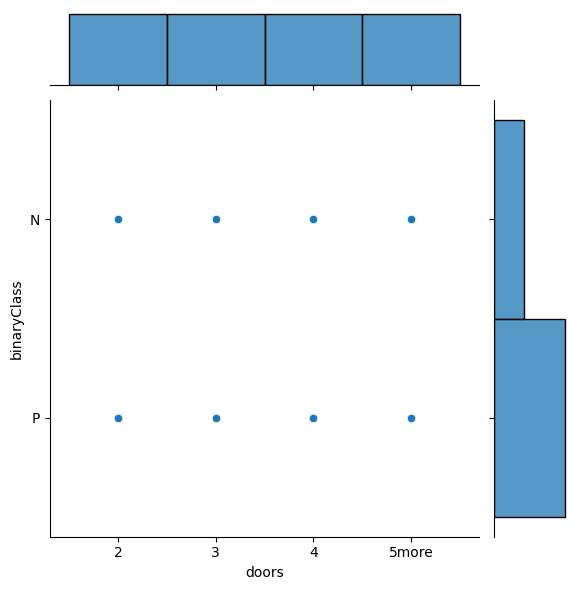

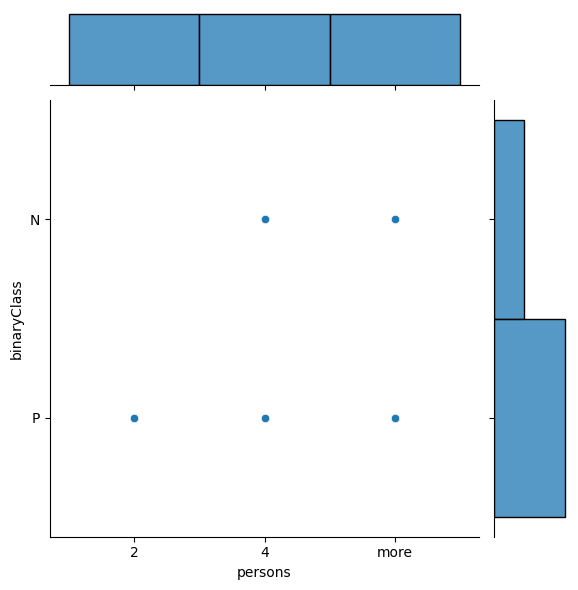

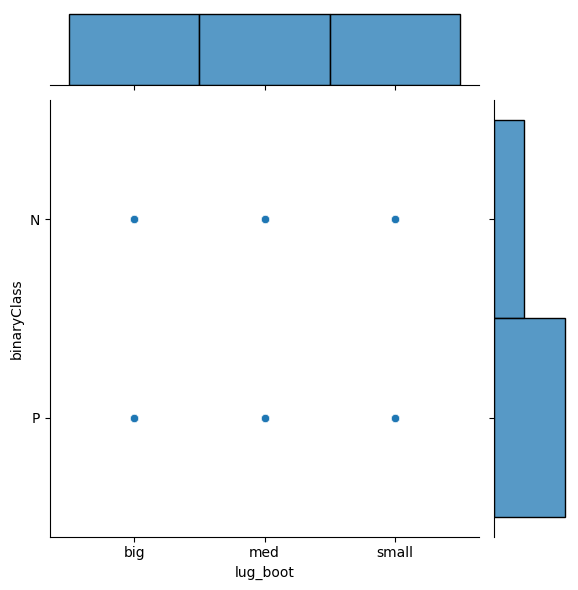

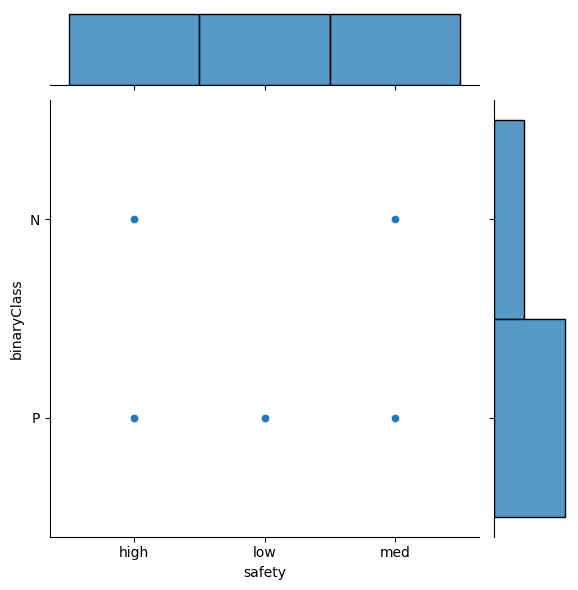

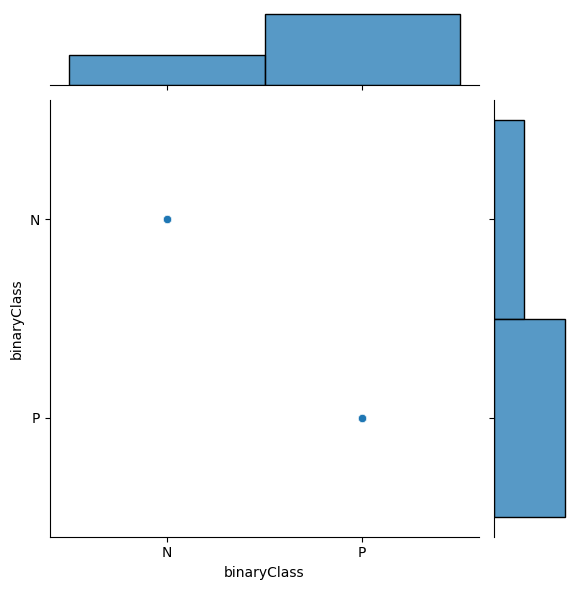

In [13]:
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [18]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [19]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [20]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [21]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [22]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [23]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [24]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

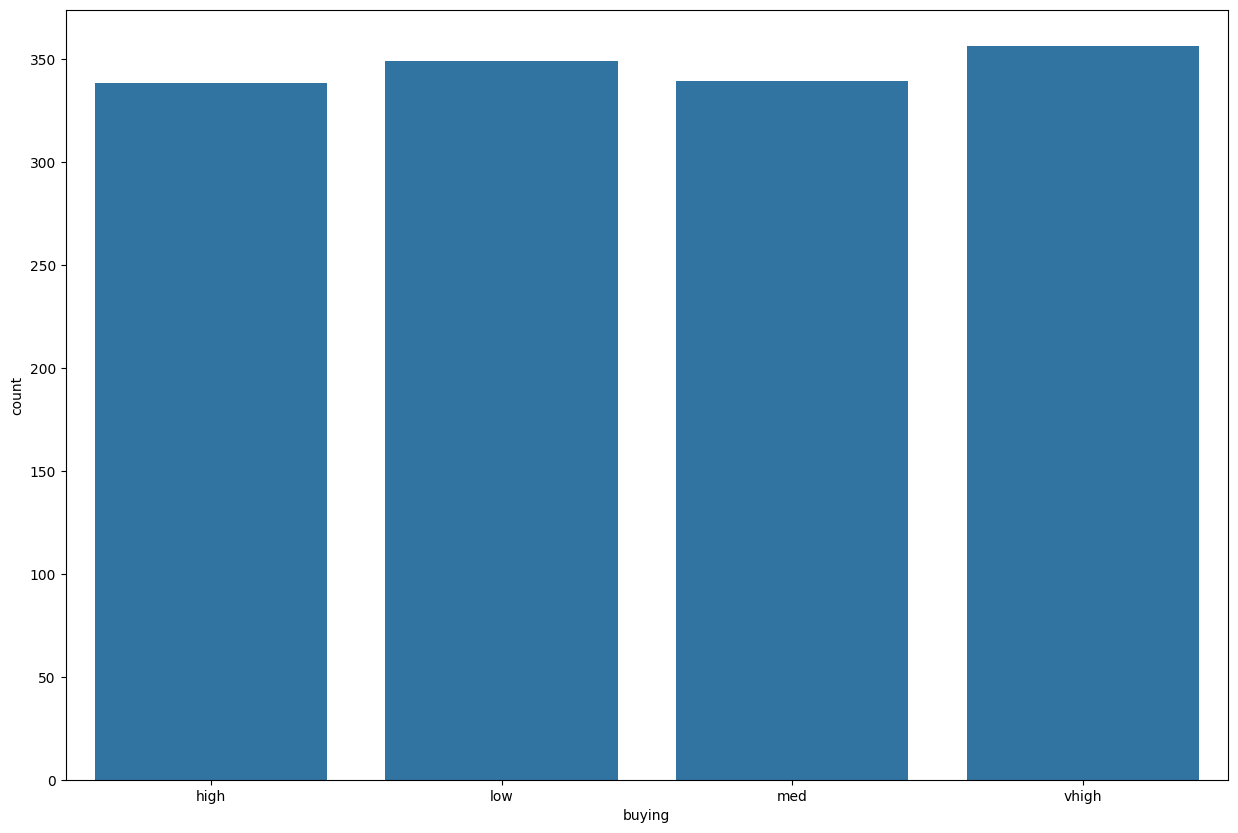

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

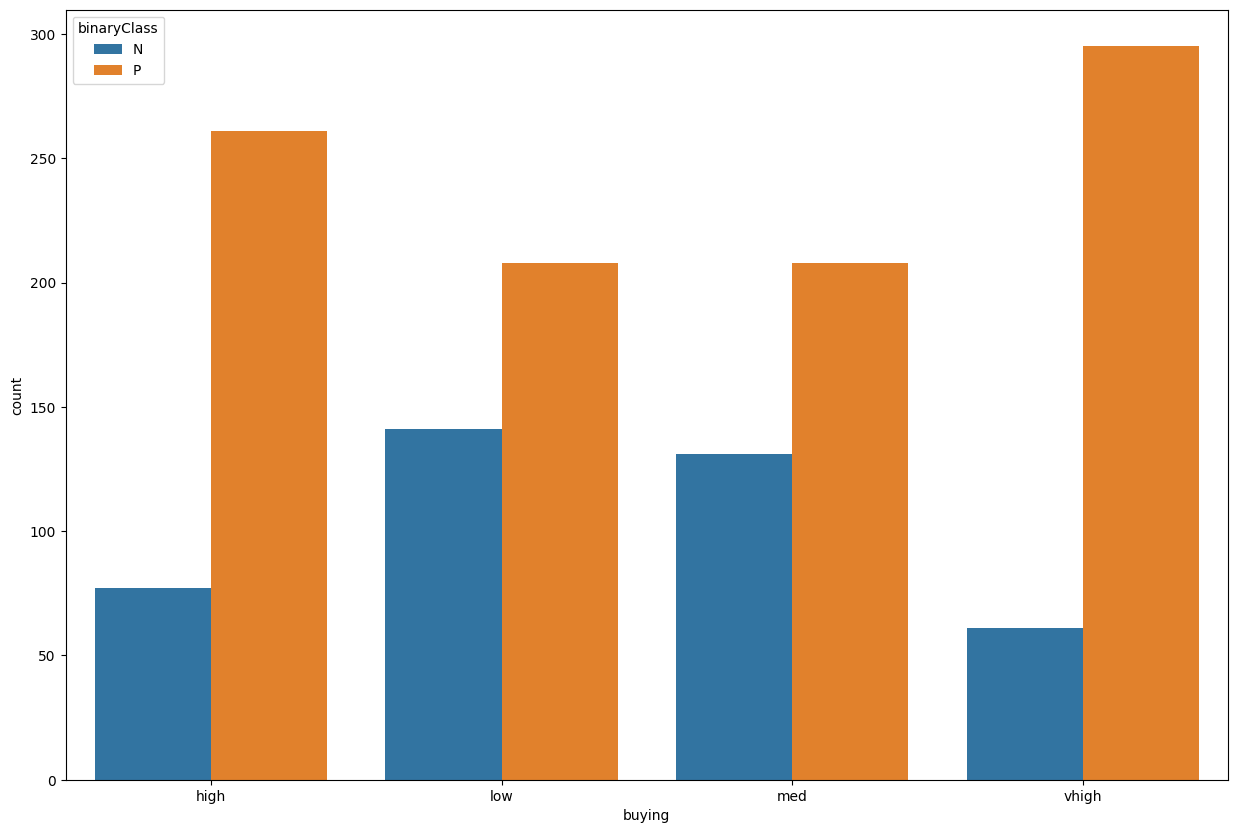

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [27]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

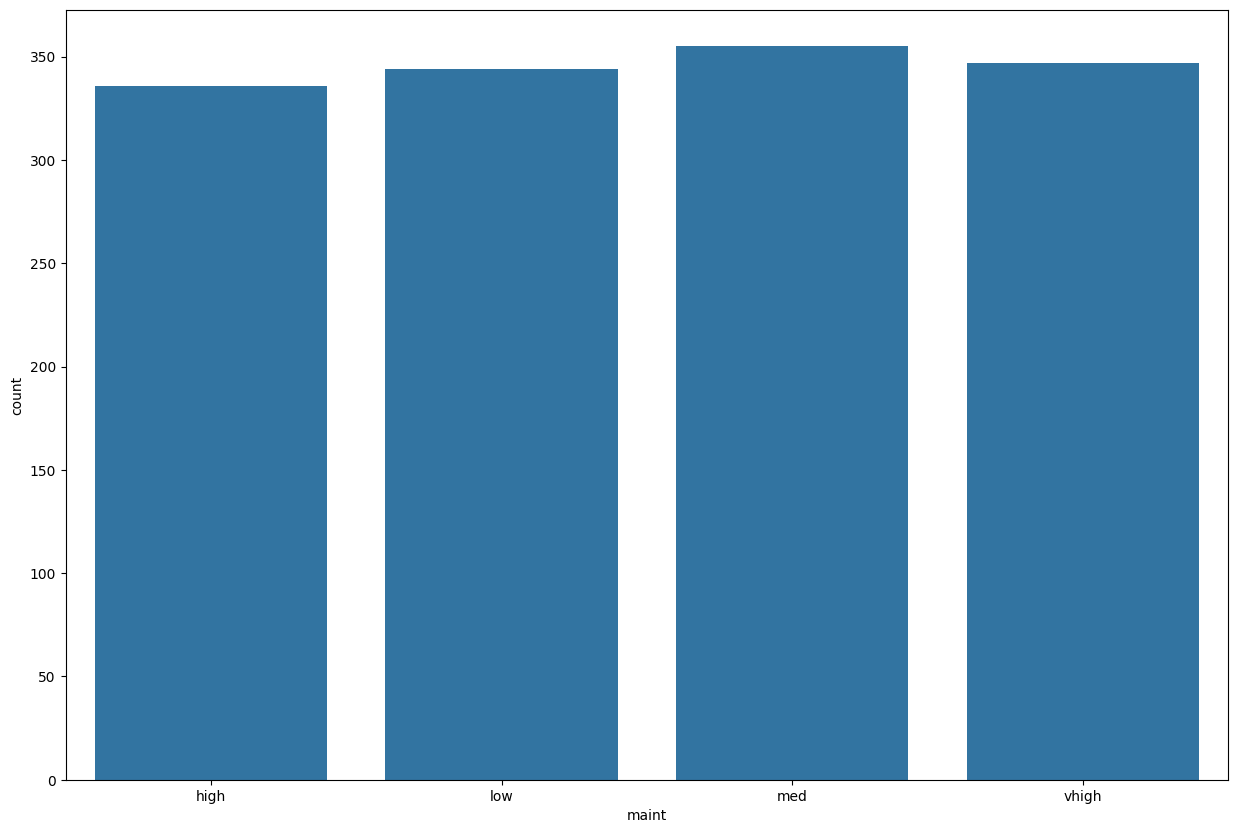

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

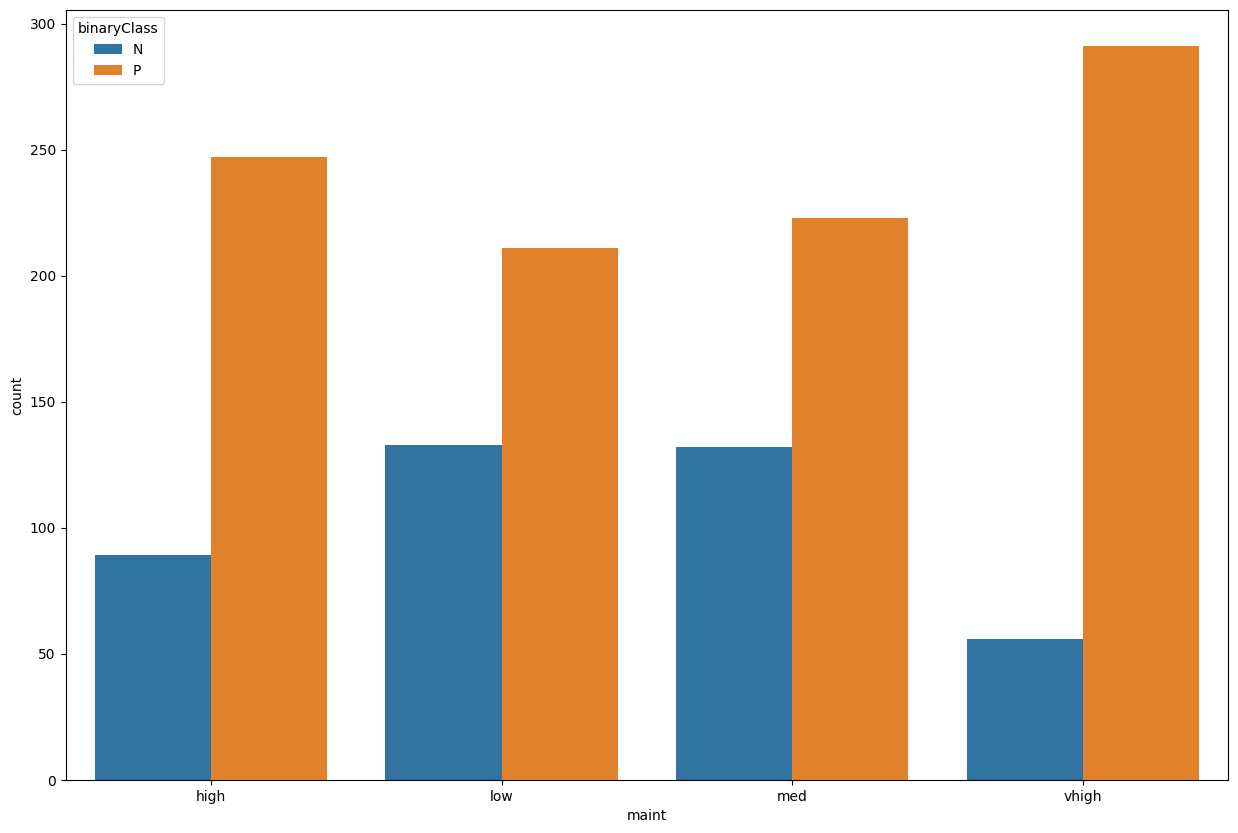

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [30]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

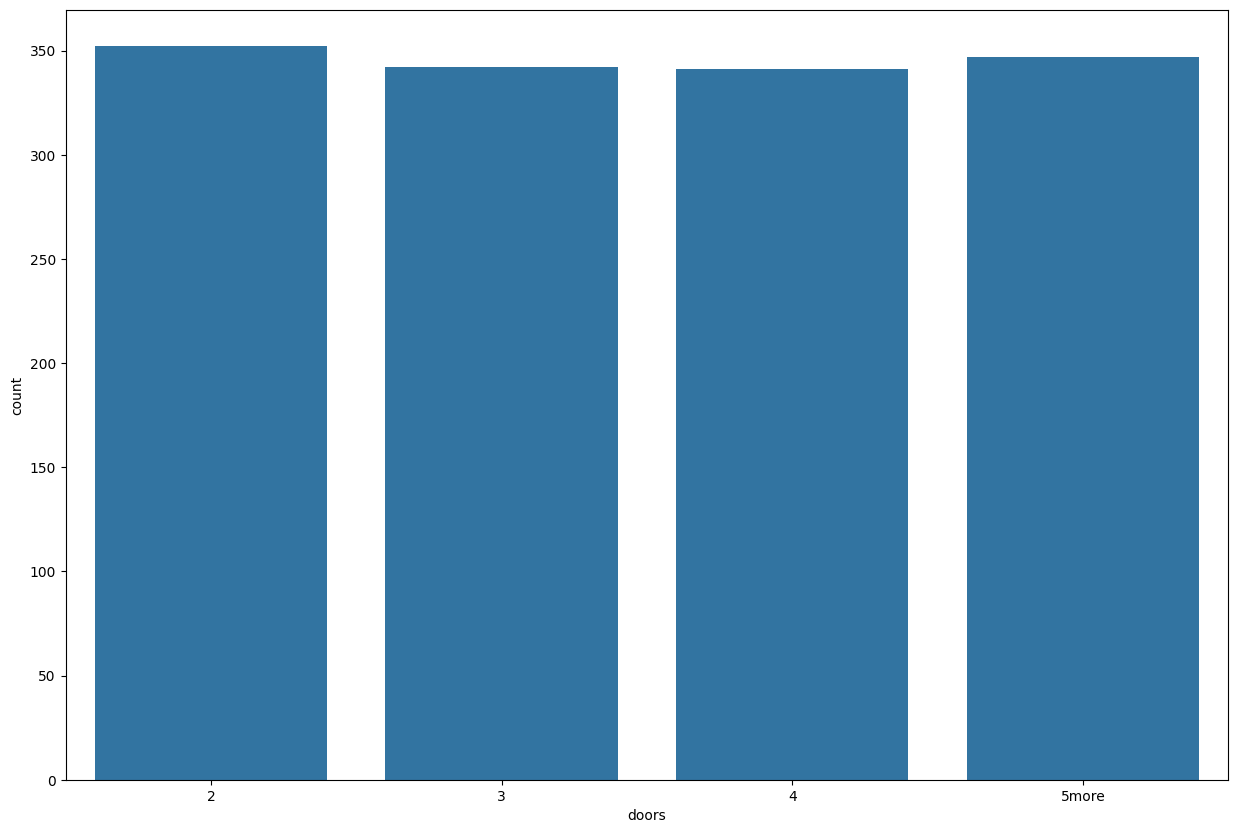

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

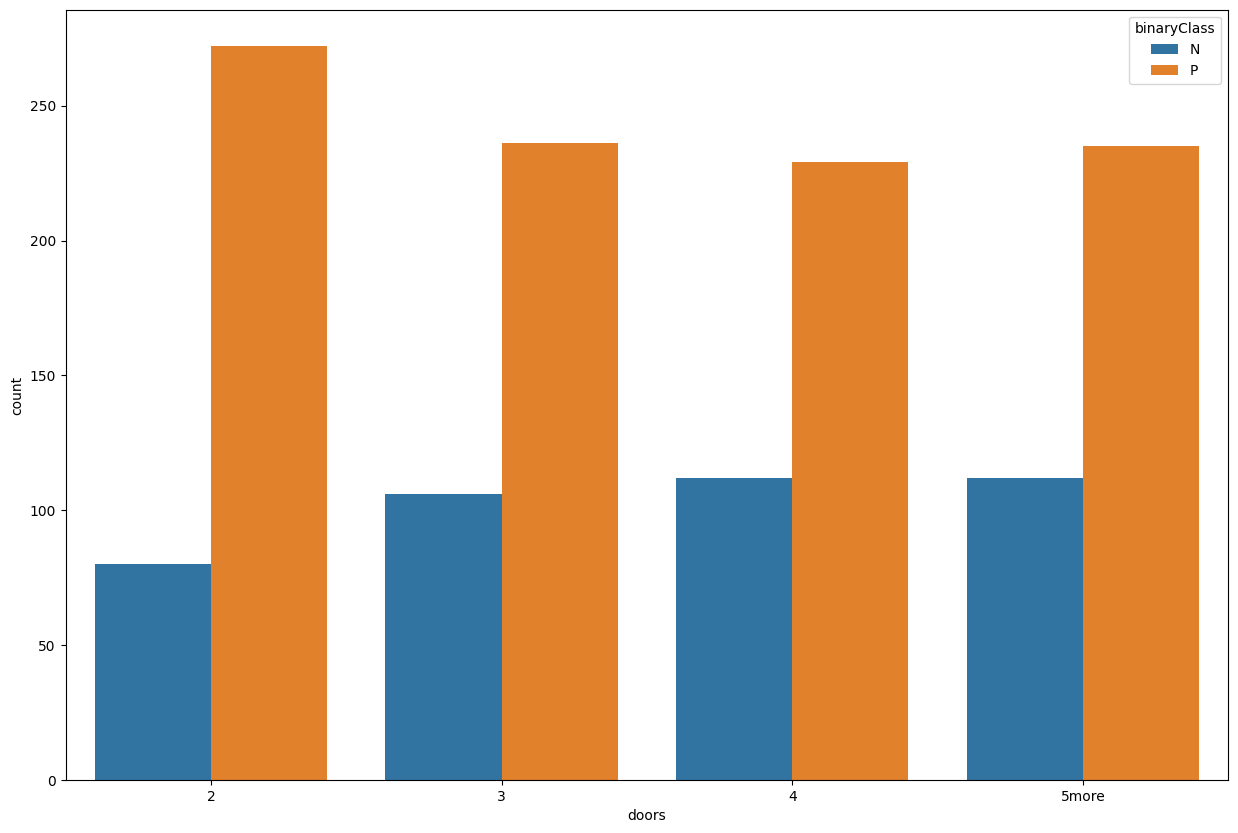

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [39]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='persons', ylabel='count'>

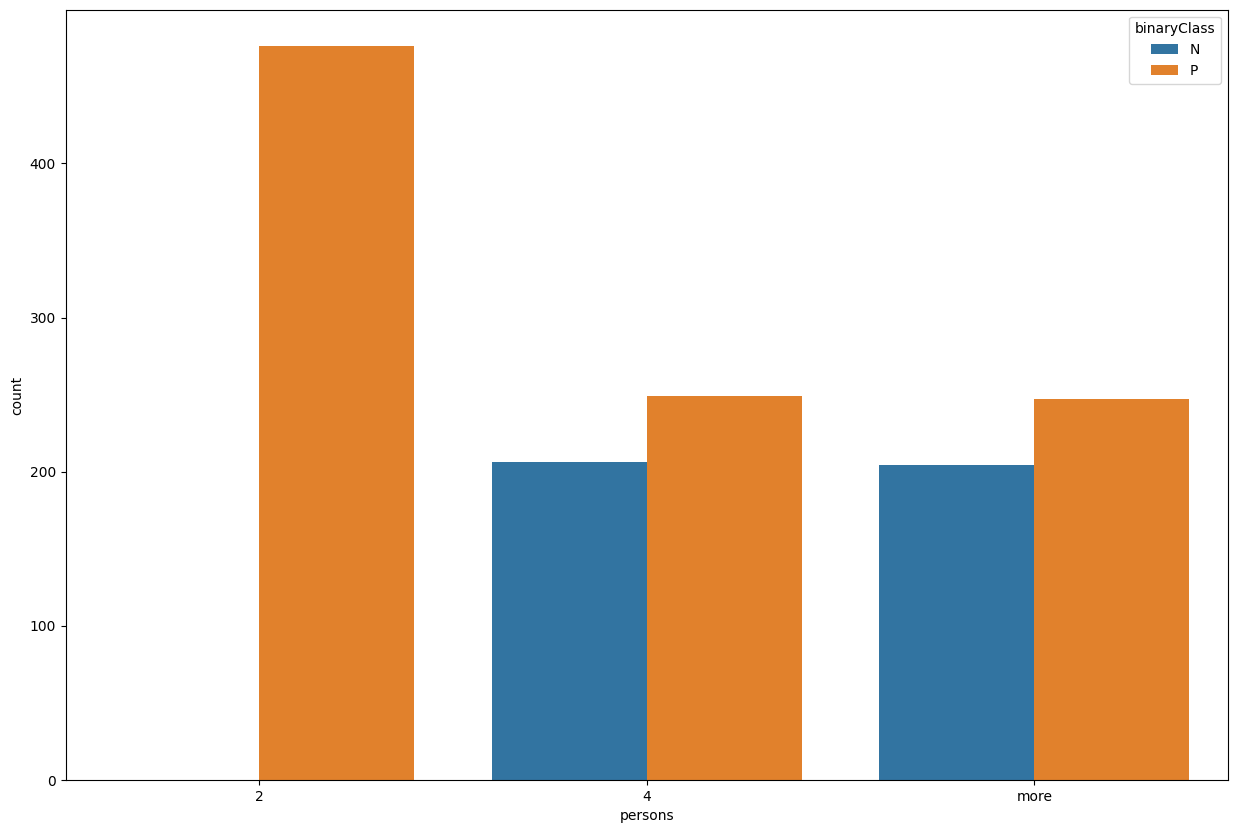

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [37]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
small,478
med,466
big,438


<Axes: xlabel='lug_boot', ylabel='count'>

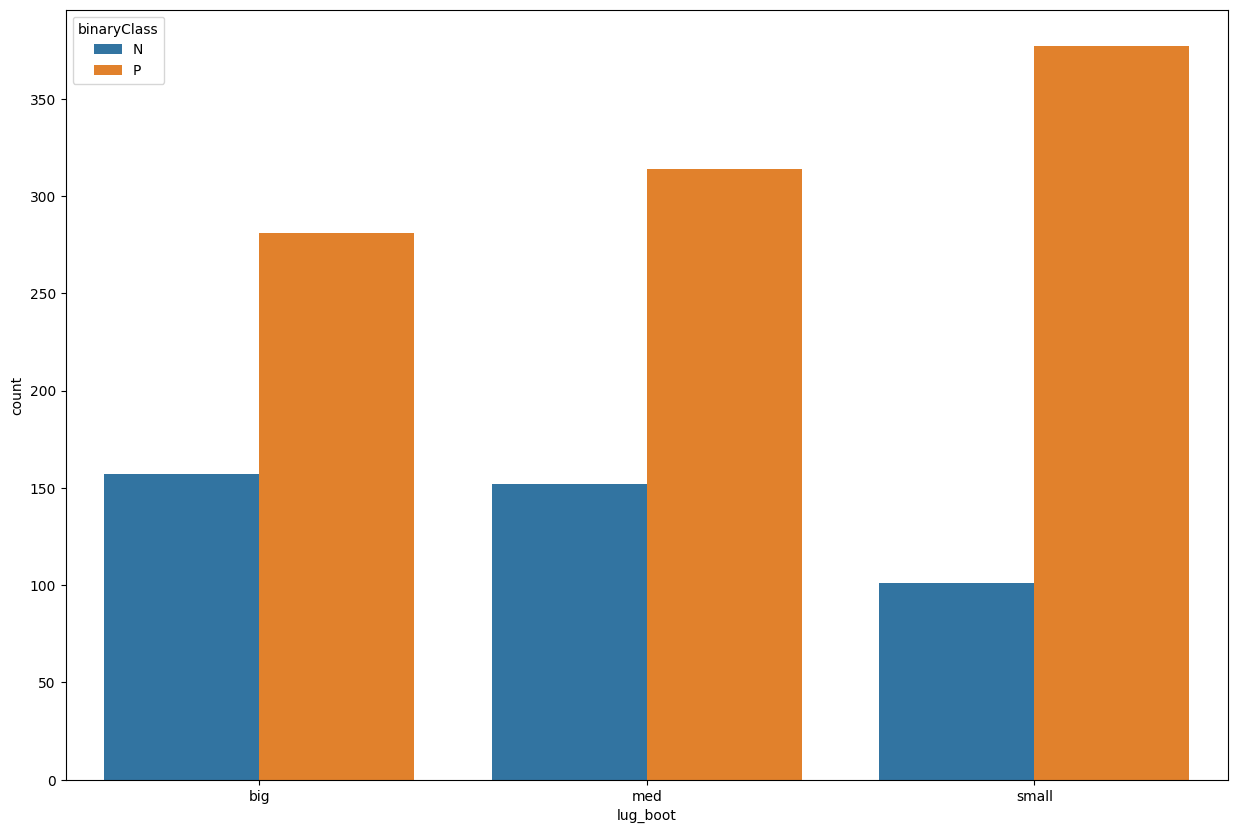

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [35]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


<Axes: xlabel='safety', ylabel='count'>

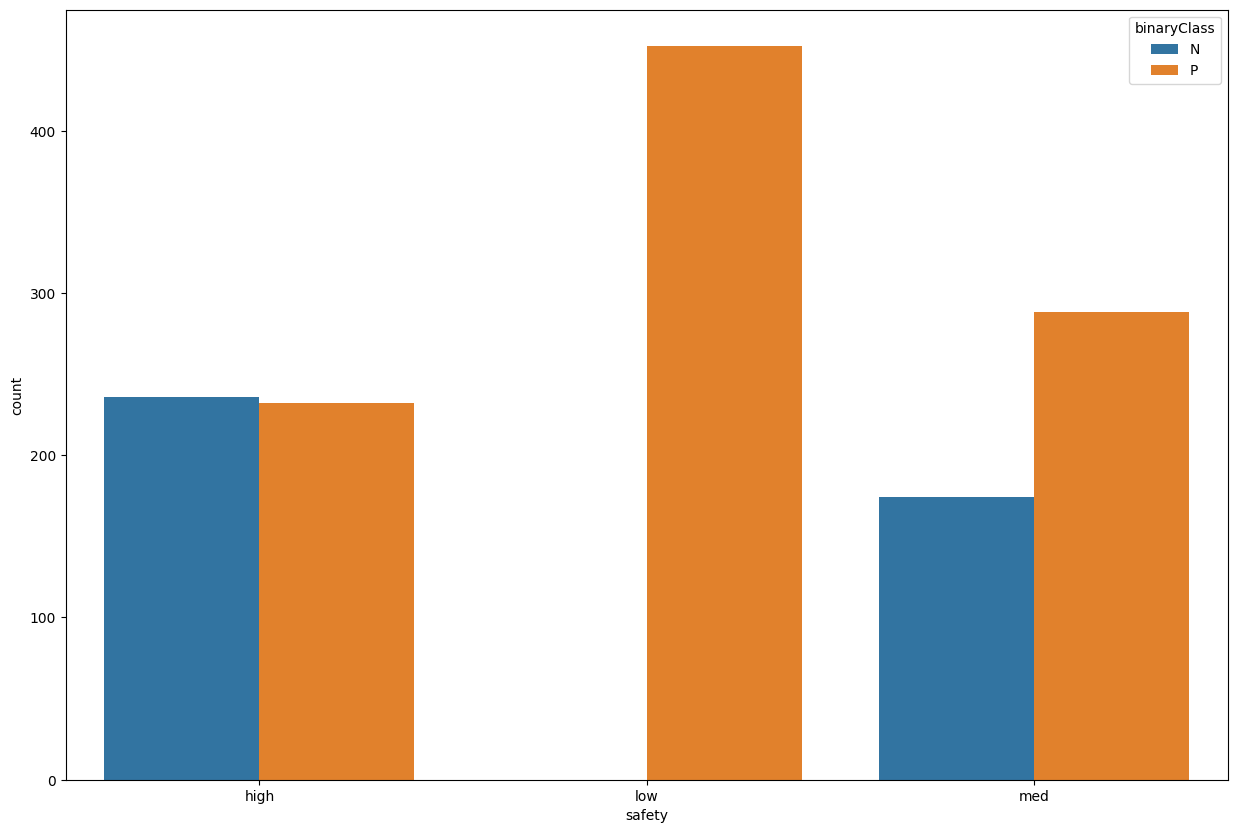

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [33]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,972
N,410


<Axes: xlabel='binaryClass', ylabel='count'>

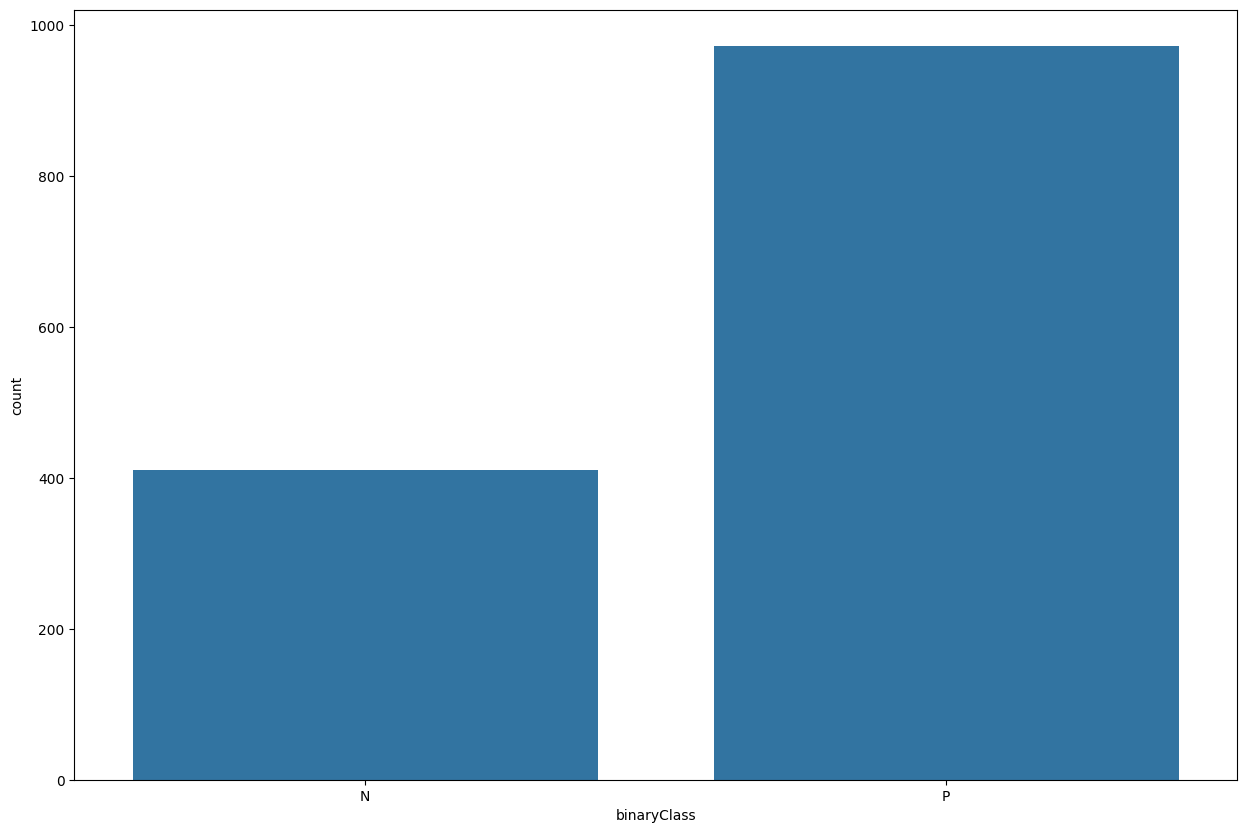

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [42]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [43]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

In [44]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

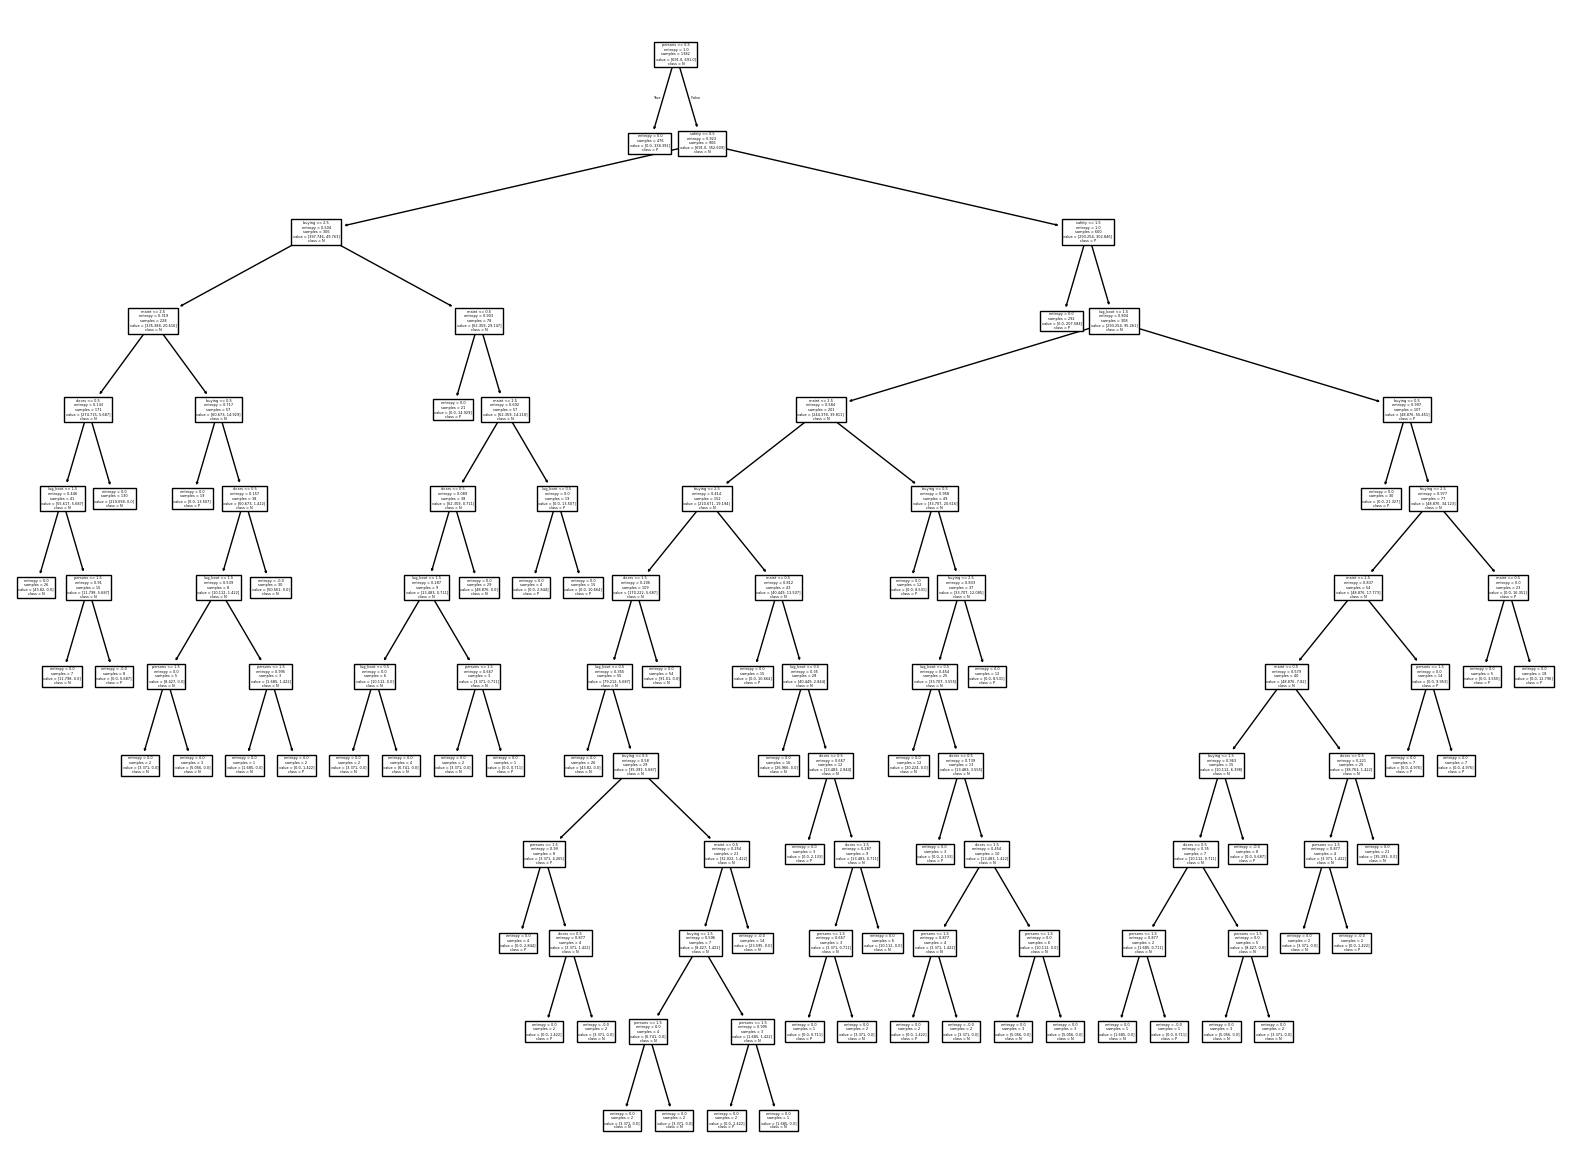

In [47]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);


In [48]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [49]:
accuracy_score(car_labels_prepared,preds)

1.0

In [50]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
car_data.columns

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [57]:
from sklearn.metrics import accuracy_score

# Assign the best estimator to tree_best
tree_best = grid_search.best_estimator_

# Now use tree_best for prediction
predictions = tree_best.predict(car_train_prepared)
accuracy = accuracy_score(car_labels_prepared, predictions)
print(accuracy)

0.8878437047756874


In [58]:
from sklearn.metrics import confusion_matrix

# ... your other code ...

# Assuming you want to compute the confusion matrix on your training data:
conf_matrix = confusion_matrix(car_labels_prepared, tree_best.predict(car_train_prepared))

print(conf_matrix)

[[381  29]
 [126 846]]


In [60]:
from sklearn.metrics import classification_report

# ... your other code ...

# Assuming you want to compute the classification report on your training data:
report = classification_report(car_labels_prepared, tree_best.predict(car_train_prepared))

print(report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



In [61]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [62]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [67]:
car_test_labels_prepared = label_enc.transform(car_test_labels)

In [70]:
from sklearn.metrics import accuracy_score

def calculate_accuracy(features, model, true_labels):

  predictions = model.predict(features)
  accuracy = accuracy_score(true_labels, predictions)
  return accuracy
accuracy_value = calculate_accuracy(car_test_prepared, tree_best, car_test_labels_prepared)
print(f"Accuracy: {accuracy_value}")

Accuracy: 0.8930635838150289


In [71]:
from sklearn.metrics import confusion_matrix

# Assuming you have a function or method to calculate and display the confusion matrix
def conf_matrix(features, model, true_labels):
  predictions = model.predict(features)
  cm = confusion_matrix(true_labels, predictions)  # Calculate the confusion matrix

  # Print or visualize the confusion matrix (e.g., using seaborn or matplotlib)
  print("Confusion Matrix:")
  print(cm)

  # Optionally, you can add further analysis or visualization here

# Now, call the function to display the confusion matrix:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

Confusion Matrix:
[[102   6]
 [ 31 207]]


In [73]:
from sklearn.metrics import classification_report

# Get the predicted labels using the trained model
predictions = tree_best.predict(car_test_prepared)

# Generate the classification report
report = classification_report(car_test_labels_prepared, predictions)
# The first argument should be the true labels, and the second should be the predicted labels.

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.97      0.87      0.92       238

    accuracy                           0.89       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.89      0.90       346

